Lab track by Maria Grazia Miccoli (Computer Science 23/24)

# 1 Linear regression and correlation 

The following dataset is a data frame with 7 economical variables, observed yearly from 1947 to 1962 (n=16).

- GNP.deflator: GNP implicit price deflator (1954=100)
- GNP: Gross National Product.
- Unemployed: number of unemployed.
- Armed Forces: number of people in the armed forces.
- Population: ‘noninstitutionalized’ population ≥ 14 years of age.
- Year: the year (time).
- Employed: number of people employed.

Source
J. W. Longley (1967) An appraisal of least-squares programs from the point of view of the user. Journal of the American Statistical Association 62, 819–841.

Text(0, 0.5, 'Employed')

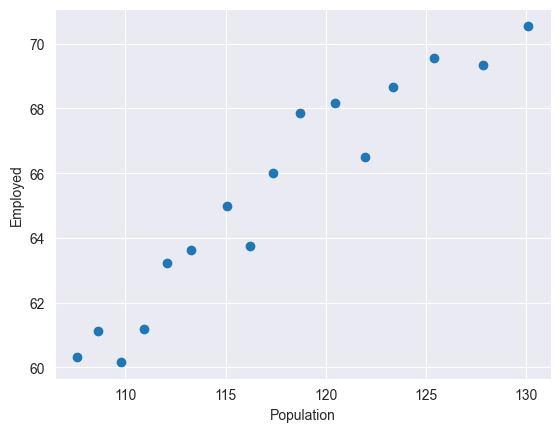

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

# plot input vs output
plt.scatter(x, y)
plt.xlabel('Population')
plt.ylabel('Employed')

Text(0, 0.5, 'Employed')

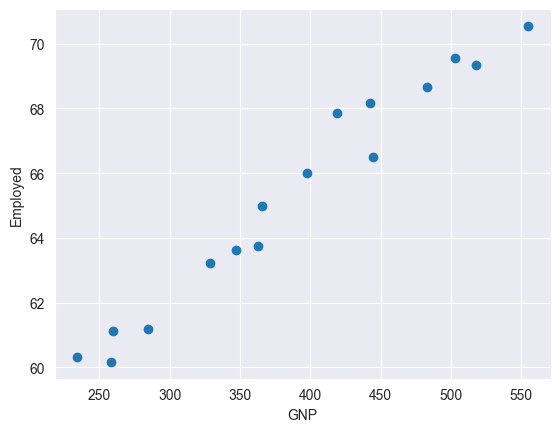

In [2]:
#GNP and employed
x, y = data[:, 1], data[:, -1]

# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP')
plt.ylabel('Employed')

Text(0, 0.5, 'Unemployed')

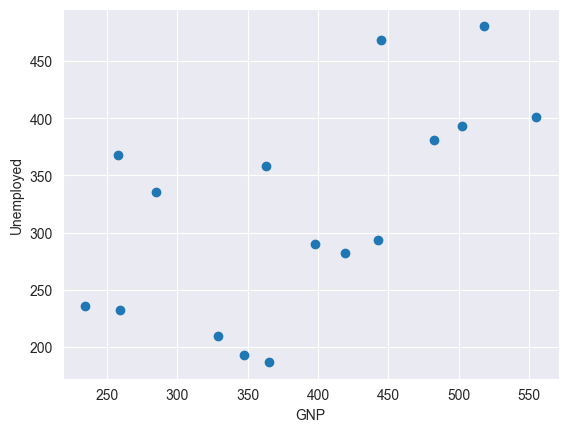

In [3]:
#GNP and UNemployed
x, y = data[:, 1], data[:, 2]

# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP')
plt.ylabel('Unemployed')

Text(0, 0.5, 'Employed')

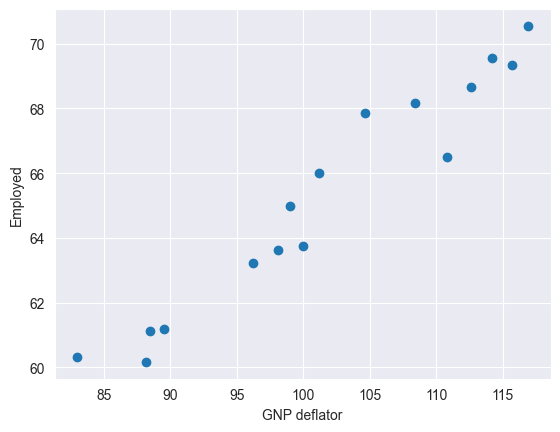

In [4]:
#GNP deflator and Employed
x, y = data[:, 0], data[:, -1]

# plot input vs output
plt.scatter(x, y)
plt.xlabel('GNP deflator')
plt.ylabel('Employed')

- Looking at the figures, which variables exhibit a positive correlation index?
- Chose one set of varibles that are linearly correlated and construct a linear regression model to fit them.  
- Choose a next value in the future and predict the corresponding value of your model.

(The topics related to this example can be found in: Example 5.4.3 and Chapter 4.6 from Meyer, "Matrix Analysis and Applied Linear Algebra").

### Conduct of the exercise n.1
#### First point

Looking only at the graphs, we can say that those in which there might be a positive correlation index between the two relative variables represented are:
- **First graph** representing the correlation between population and number of employed. As the population increases, the number of employed increases.
- **Second graph** representing the correlation between GNP and number of employed. Knowing that GNP is how much the country has earned from the total production of goods and services (at current prices), we can say that as GNP increases, the number of employed also increases.
- **Fourth graph** representing the correlation between GNP deflator and number of employed. Knowing that the GNP deflator is a measure of price changes in an economy, we can say that as the GNP deflator increases, the number of employed also increases. A deflator greater than 100 indicates that prices have increased compared to the reference year. (In the trace the value 100 is reached in 1954)

All three graphs above, show a positive correlation index, compared to the third one (representing the correlation between GNP and number of unemployed) in which the data are scattered and show less correlation with each other.

#### Second point

To carry out the second point, let us actually see which variables, even among those not seen within the previous point, are linearly correlated with each other. To do this, we use the **coefficient of linear correlation** define like $\rho_{xy} = \cos \theta = \frac{\mathbf{z_x}^T \mathbf{z_y}}{\|\mathbf{z_x}\| \|\mathbf{z_y}\|}$, which exploits the cosine.

In [5]:
#Renaming of features for easier reading of the code
dataframe.rename(columns={0: "GNPdeflator",1:"GNP",2:"Unemployed",3:"Armed Forces",4:"Population",5:"Year",6:"Employed"}, inplace=True)
dataframe

,GNPdeflator,GNP,Unemployed,Armed Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221
5,98.1,346.999,193.2,359.4,113.270,1952,63.639
6,99.0,365.385,187.0,354.7,115.094,1953,64.989
7,100.0,363.112,357.8,335.0,116.219,1954,63.761
8,101.2,397.469,290.4,304.8,117.388,1955,66.019
9,104.6,419.180,282.2,285.7,118.734,1956,67.857


Also taking into account the analysis made in the previous point, the number of employed persons was identified as the target features.
Consequently, with the aim of predicting the target y considering only highly correlated features, we proceed with the correlation calculation.
As mentioned before, the cosine technique will be used, taking into account the mean, standard deviation and z-score of each feature. 

In [6]:
#Definition of independent features
x1 = dataframe['GNPdeflator']
x2 = dataframe['GNP']
x3 = dataframe['Unemployed']
x4 = dataframe['Armed Forces']
x5 = dataframe['Population']
x6 = dataframe['Year']

#Definition of target feature
y = dataframe['Employed'] 

In [7]:
import numpy as np 

#Average of all variables x
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
mean_x3 = np.mean(x3)
mean_x4 = np.mean(x4)
mean_x5 = np.mean(x5)
mean_x6 = np.mean(x6)

#Standard deviation for each variable x
standardDev_x1 = np.std(x1)
standardDev_x2 = np.std(x2)
standardDev_x3 = np.std(x3)
standardDev_x4 = np.std(x4)
standardDev_x5 = np.std(x5)
standardDev_x6 = np.std(x6)

#Averange and Standard deviation for the y
mean_y = np.mean(y)
standardDev_y = np.std(y)

#z-score of all variables x
z_scoreX1 = (x1 - mean_x1) / standardDev_x1
z_scoreX2 = (x2 - mean_x2) / standardDev_x2
z_scoreX3 = (x3 - mean_x3) / standardDev_x3
z_scoreX4 = (x4 - mean_x4) / standardDev_x4
z_scoreX5 = (x5 - mean_x5) / standardDev_x5
z_scoreX6 = (x6 - mean_x6) / standardDev_x6

#z-score for y target
z_scoreY = (y - mean_y) / standardDev_y

#Compute the cosine for the correlation between y and x_i
correlation_y_x1 = np.dot(z_scoreX1, z_scoreY) / (np.linalg.norm(z_scoreX1) * np.linalg.norm(z_scoreY))
correlation_y_x2 = np.dot(z_scoreX2, z_scoreY) / (np.linalg.norm(z_scoreX2) * np.linalg.norm(z_scoreY))
correlation_y_x3 = np.dot(z_scoreX3, z_scoreY) / (np.linalg.norm(z_scoreX3) * np.linalg.norm(z_scoreY))
correlation_y_x4 = np.dot(z_scoreX4, z_scoreY) / (np.linalg.norm(z_scoreX4) * np.linalg.norm(z_scoreY))
correlation_y_x5 = np.dot(z_scoreX5, z_scoreY) / (np.linalg.norm(z_scoreX5) * np.linalg.norm(z_scoreY))
correlation_y_x6 = np.dot(z_scoreX6, z_scoreY) / (np.linalg.norm(z_scoreX6) * np.linalg.norm(z_scoreY))

print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with GNPdeflator ", correlation_y_x1)
print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with GNP ", correlation_y_x2)
print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with UNEMPLOYED ", correlation_y_x3)
print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with ARMED FORCES ", correlation_y_x4)
print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with POPULATION ", correlation_y_x5)
print("Coefficient of linear correlation of NUMBER OF EMPLOYED  with YEARS ", correlation_y_x6)

Coefficient of linear correlation of NUMBER OF EMPLOYED  with GNPdeflator  0.970898525061056
Coefficient of linear correlation of NUMBER OF EMPLOYED  with GNP  0.9835516111796695
Coefficient of linear correlation of NUMBER OF EMPLOYED  with UNEMPLOYED  0.5024980838759943
Coefficient of linear correlation of NUMBER OF EMPLOYED  with ARMED FORCES  0.4573073999764821
Coefficient of linear correlation of NUMBER OF EMPLOYED  with POPULATION  0.9603905715943755
Coefficient of linear correlation of NUMBER OF EMPLOYED  with YEARS  0.9713294591921189


We then obtained a measure of the degree of correlation between x and y. Accordingly, only the features with the highest correlation were chosen, namely: **GNPdeflator, GNP, Population, Year.**

Now, let us move on to the creation of the linear regression model.
We know that the number of people employed depends on the GNP, the GNP deflactor, the population and the year. Therefore, to predict the number of employed knowing the value of these variables, we need a function (in this case linear) that best fits the data.
Mainly we will have:
- A matrix A, which will represent the features x (+ bias)
- A vector b, which will represent the values of the y variables associated with each set of x variables.
- A vector x, which will represent the weights, the importance, given to each variable x in order to predict y.

In the next cell, an attempt will be made to obtain the vector x to predict y.

In [8]:
#Least square solition with pytorch
import torch

#Definition of the variables x and y, omitting the last line outside the fit in order to use it in the next point.
x_values = dataframe[['GNPdeflator', 'GNP', 'Population', 'Year']].values 
b_values = dataframe['Employed'].values
x = x_values [:15,:]
b = b_values[:15]

#Addition of column in matrix A to represent bias (column all to 1)
(nx,_) = x.shape
ones_column = np.ones((nx, 1))
A = np.hstack((ones_column, x))

AT = torch.tensor(A,dtype=torch.float64)
bT = torch.tensor(b,dtype=torch.float64)

X = torch.linalg.lstsq(AT, bT)

print("Vector x:", np.asarray(X.solution))
#print(torch.tensor(p)-X.solution)
#print(X.rank)
#print(X.residuals)
#print(X.singular_values)

Vector x: [ 3.57927247e+02 -2.35671977e-01  9.16785742e-02 -3.41827722e-01
 -1.35059509e-01]


Then we can compose our linear function for the prediction of y:

$
f(x) = + 3.5792(bias) -2.36 * GNPdeflator +9.17 * GNP -3.42 * Population -1.35 * Year 
$


#### Third point
We now take the last row of the original dataset to predict its corresponding y using the linear function found earlier.

In [9]:
# Let us take the original last line
x = x_values[15]
b = b_values[15]
print("New X values: ", x)
print("Aspected y value:", b)

New X values:  [ 116.9    554.894  130.081 1962.   ]
Aspected y value: 70.551


In [10]:
import numpy as np

#Adding 1 for the bias
x = np.insert(x, 0, 1)

# Make the prediction
y = np.dot(x.T,np.asarray(X.solution))

print("Original y values: ", b)
print("Predicted y values: ", y)

Original y values:  70.551
Predicted y values:  71.79703529095909


# 2 Eigenfaces

Download the files olivetti_faces.npy and olivetti_faces_target.npy . 

In [11]:
import numpy as np

In [12]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [13]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [14]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

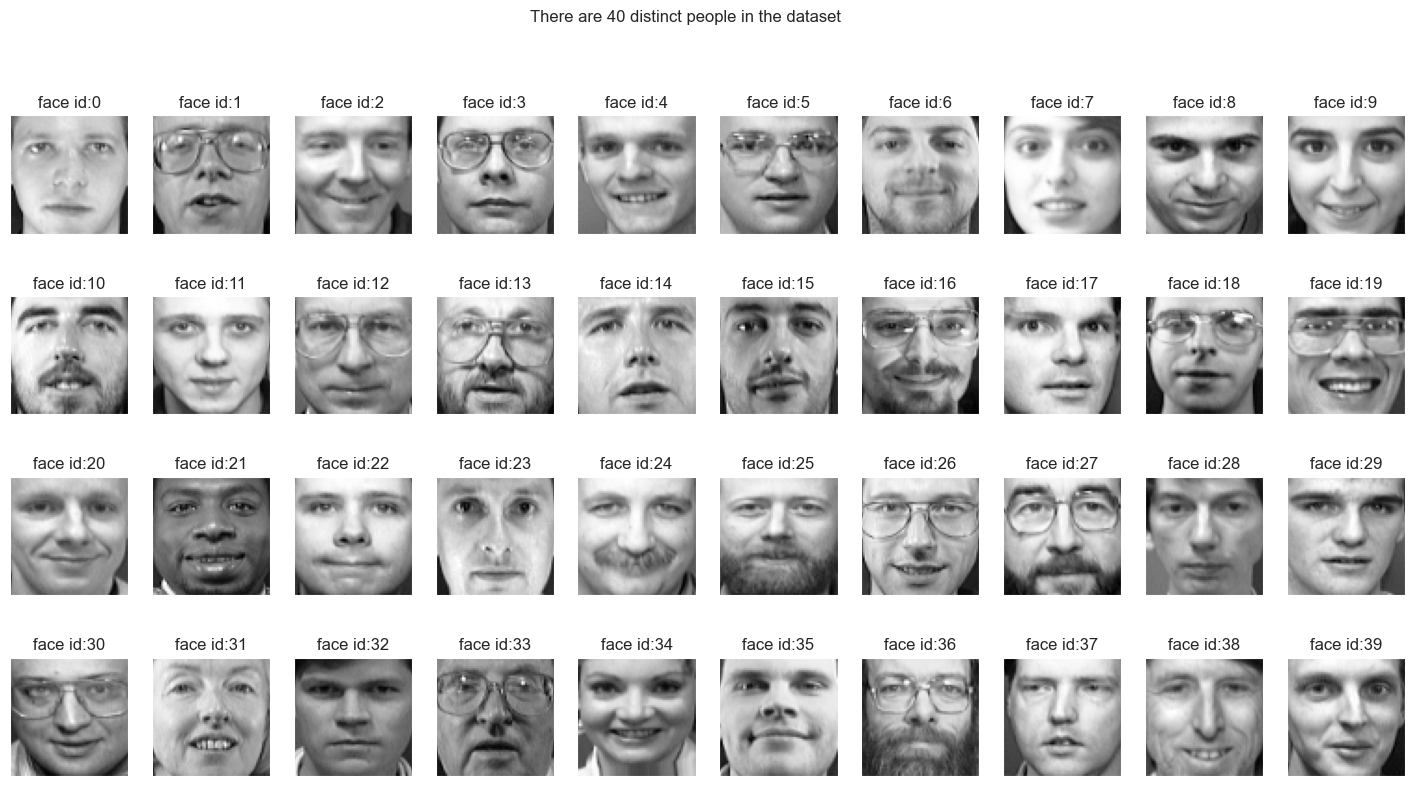

In [15]:
show_40_distinct_people(data, np.unique(target))

In [16]:
#We reshape images for our  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


- Check and compare all the studied techniques to find the minimal value of $k$, number of principal components that are useful to classify the faces.

- Classify all the faces in the testset and compute the confusion matrix . The element in position $i,j$ of the confusion matrix contains the number of observations known to be in group $i$ and predicted to be in group $j$. Use  sklearn.metrics.confusion_matrix and compute also the classification report using sklearn.metrics.classification_report.

(The topics related to this exercise can be found in: eigenfaceforrecognition-TurkPentland-jcn1991.pdf Chapter 6 from Elden, "Numerical Linear Algebra and Applications in Data Mining")

### Conduct of the exercise n.2
#### First point

In order to find the optimal k, we need the singular values of the train matrix. Accordingly, we centre the train matrix and decompose it into its corresponding SVD form. The SVD technique decomposes the original matrix into three matrices $U \sum V^T$  and the columns of the matrices U and V are called left and right singular vectors, respectively. While the diagonal elements of $\sum$ are said singular values.


In [18]:
import warnings
warnings.filterwarnings("ignore")
from scipy.linalg import svd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt 


(nrc,nt) = X_train.shape
print(nrc,nt)

def centralizing_matrix(matrix,nrc,nt):
    matrix_sum = np.sum(matrix,axis=1)/nt
    e = np.ones((1,nt))
    centralizing_matrix =matrix-np.dot(matrix_sum.reshape(nrc,1),e)
   
    return centralizing_matrix

X_trainC = centralizing_matrix(X_train,nrc,nt)

U, S, VT = svd(X_trainC)
singular_values = S
singular_values

280 4096


array([115.65021921,  53.60780435,  37.87629115,  32.25059585,
        29.44320185,  25.61298961,  23.36836107,  20.85217286,
        20.45953807,  19.14477133,  18.54698076,  17.59573116,
        16.8132345 ,  15.99646094,  15.35254918,  14.89075181,
        14.24920778,  13.9137765 ,  13.32140692,  12.8026415 ,
        12.39373316,  11.76915229,  11.66594042,  11.54126058,
        11.24306775,  10.83865445,  10.66143974,  10.47269743,
        10.3278773 ,   9.87578209,   9.67898009,   9.38421892,
         9.12079058,   8.8783905 ,   8.74233297,   8.48518612,
         8.40218073,   8.29560387,   8.12899234,   8.06218092,
         7.93758782,   7.69444   ,   7.59937322,   7.44696458,
         7.34172927,   7.25008474,   7.06275156,   7.02741961,
         6.96422957,   6.80067677,   6.66650756,   6.62012137,
         6.54565202,   6.49057137,   6.33531442,   6.3160628 ,
         6.29849895,   6.18796189,   6.17306985,   6.12036508,
         5.92912025,   5.82099695,   5.80345759,   5.74

So let's start exploring the various techniques designed to define the best k.

##### Scree Plot
This first method is a visual and very often subjective method. It involves representing the singular values in a cartesian coordinate system and then selecting $\( k \)$ at the point where the graph shows a sharper curve, forming a kind of ‘elbow’.

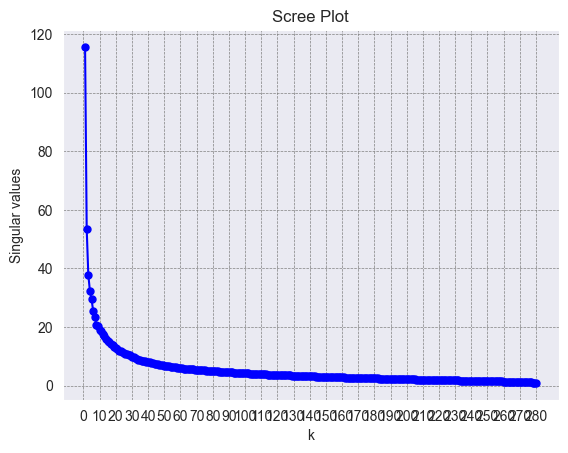

In [19]:
plt.plot(np.arange(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b', markersize=5)
plt.xlabel('k')
plt.ylabel('Singular values')
plt.title('Scree Plot')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.xticks(np.arange(0, len(singular_values) + 1, step=10))  
plt.grid(True) 
plt.show()

In our case, the point at which the graph shows a sharper curve is on a k of 30

In [20]:
kScree = 30

##### Kaiser rule

Another method for finding how many principal components to keep is the Kaiser rule. In general, its basic version is that if a component has a singular value greater than 1, then it is kept because it is considered good as a summary of the data. However, this version has a flaw: it retains components with singular values even slightly greater than 1, which may not be representative. Consequently, the singular mean value is calculated first and then retained all those singular values which, when squared, are greater than the mean value.

$$
k = \sigma_i^2 \geq \frac{1}{n} \sum_{j=1}^n \sigma_j^2
$$


In [21]:
k_kaiser_rule = len(singular_values[singular_values**2>((np.sum(singular_values**2))/len(singular_values))])
print("k = " + str(k_kaiser_rule))

k = 29


##### Cumulative Percentage of Total Variance

Within this method, we consider a function $S_k$ which is the percentage of variation accumulated by the k points:
$$
s_k = 100 \cdot \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^r \sigma_i^2}
$$

It is then necessary to choose a threshold value $S^*$, generally between 70% and 80%, which allows us to return only those k's with $S_k > S^*$


In [22]:
def compute_sk(k):
    k_sum = 0
    for i in range(1,k):
        k_sum+= singular_values[i]**2
    rank = np.linalg.matrix_rank(X_train)
    r_sum = 0
    for i in range(1,rank):
        r_sum += singular_values[i]**2
    s_k = 100 *(k_sum/r_sum)
    return s_k
    
s_cutoff = (compute_sk(len(singular_values)) * 80)/100

kc = 0
for i in range(1,100):
    sk = compute_sk(i)
    if  sk > s_cutoff:
        kc = i
pass

print("k = " + str(kc))

k = 99


##### Entropy

This method defines the contribution that each individual value makes to the component via the function:

$$
f_k = \frac{ \sigma_k^2}{\sum_{i=1}^r \sigma_i^2}
$$

Thus entropy, or how informative a component is, is given by:

$$
E = \frac{1}{\log(2)} \sum_{k=1}^r f_k \log(f_k)
$$


In [23]:
t = pd.DataFrame(columns=['Tollerance','k'])

tol=[1e-1,7e-2,5e-2,1e-2,5e-3,1e-3,0]
k_entropy = []
for ind in tol:  
    f=S**2. / np.sum(S**2.)
    r = S.shape
    entropy = (-1/np.log(r))*np.sum(f*np.log(f))
    ks = int(r*entropy)
    perc=1-ind
    nc = int(r*entropy*perc)
    k_entropy.append(int(nc))

for i in range(len(tol)):
    t.loc[len(t)] = [tol[i],k_entropy[i]]

t

,Tollerance,k
0,0.100,126.0
1,0.070,130.0
2,0.050,133.0
3,0.010,139.0
4,0.005,140.0
5,0.001,140.0
6,0.000,140.0


##### The relative error inside the approssimation the matrix
In this method, however, reference is made to the Eckert-Young theorem.

In [24]:
t = pd.DataFrame(columns=['Tollerance','k'])

tol=[1e-1,7e-2,5e-2,1e-2,5e-3,1e-3,0]
k_rb = []
for ind in tol:
    f= (S)/S[0]
    nc = np.sum(f >= ind)     
    k_rb.append(int(nc))
    
for i in range(len(tol)):
   t.loc[len(t)] = [str(tol[i]),k_rb[i]]

t

,Tollerance,k
0,0.1,23
1,0.07,39
2,0.05,63
3,0.01,275
4,0.005,280
5,0.001,280
6,0,280


Having arrived at this point, we do not just have a single value of k, but rather a set of k's which, when taken in this way, do not answer the question ‘how many k's do I need to maintain in order to have a matrix that is reduced but still allows me to maintain a fair accuracy?’
Consequently, I define a function that, based on the Euclidean norm, calculates the relative error between the original matrix and the reconstructed matrix having used the k principal values:

In [25]:
def relative_error(original_Matrix, reconstruction_matrix):
    normNum = linalg.norm(original_Matrix - reconstruction_matrix)
    normDen = linalg.norm(original_Matrix)
    
    error = normNum/normDen
    
    return error

In [26]:
from sklearn.decomposition import PCA

def get_reduction_PCA_matrix(original_matrix, k_components):
    pca = PCA(copy=True, n_components=k_components,whiten = True)
    reduction_matrix = pca.fit_transform(original_matrix)
    reconstruction_matrix = pca.inverse_transform(reduction_matrix)
    return reduction_matrix, reconstruction_matrix

In [27]:
t = pd.DataFrame(columns=['Method', 'Error','Tollerance','k'])

method_k_finder = ['Scree-Plot','Kaiser-Rule','Cumulative-Percentage-of-Total-Variance','Entropy', 'Relative-error-based']

k_finded = {'Scree-Plot': kScree,
            'Kaiser-Rule': k_kaiser_rule,
            'Cumulative-Percentage-of-Total-Variance': kc,
            'Entropy': k_entropy,
            'Relative-error-based': k_rb}

for _,method in enumerate(method_k_finder):
    if method != 'Entropy' and method != 'Relative-error-based':
        k = k_finded[f'{method}']
        reducted_matrix, reconstruction_matrix = get_reduction_PCA_matrix(X_trainC, k)
        error = relative_error(X_trainC, reconstruction_matrix)
        t.loc[len(t)] = [f'{method}',f'{error:.9f}','-',f'{k}']
        
    else:
        n_k = len(k_finded[f'{method}'])
        for n in range(0,n_k):
            k = k_finded[f'{method}'][n]
            reducted_matrix,reconstruction_matrix = get_reduction_PCA_matrix(X_trainC,k)
            error = relative_error(X_trainC, reconstruction_matrix)
            t.loc[len(t)] = [f'{method}',f'{error:.9f}',tol[n],k]

t

,Method,Error,Tollerance,k
0,Scree-Plot,0.360760781,-,30
1,Kaiser-Rule,0.365321329,-,29
2,Cumulative-Percentage-of-Total-Variance,0.201761148,-,99
3,Entropy,0.165131766,0.1,126
4,Entropy,0.160129287,0.07,130
5,Entropy,0.156567640,0.05,133
6,Entropy,0.149446571,0.01,139
7,Entropy,0.148455600,0.005,140
8,Entropy,0.148311544,0.001,140
9,Entropy,0.148187104,0,140


From this last table we can see that both entropy and relative error inside the approximation the matrix obtain the lowest error values, thus reducing the original matrix with one not too far from it. But, in order to maintain the right compromise between the number of k and the error obtained, we will choose k obtained through the entropy formula, i.e. k = 140.

We then set the PCA with a number of k equal to 140 and apply it to the train set of images.

In [28]:
from sklearn.decomposition import PCA

k = k_entropy[6]

pca = PCA(copy=True, n_components=k,whiten = True).fit(X_trainC) 
IM_pca = pca.transform(X_trainC)      
IM_pca = IM_pca/np.sqrt(nrc)

print("IM_pca: " + str(IM_pca.shape))

IM_pca: (280, 140)


We assign the train set images processed by the PCA their own unique class:

In [29]:
cli = {}
for i in range(40):
    cli[str(i)] = []
    
unique_classes = np.unique(y_train)

for c in unique_classes:
    for index,val in enumerate(y_train):
        if val == c:
            PT1 = X_trainC[index]
            Pimg = pca.transform([PT1])
            cli[str(c)].append(Pimg)
    cli[str(c)] = np.asarray(cli[str(c)])

om = {}
for i in range(0,40):
    om[i]=np.mean(cli[str(i)],axis=0)

#### Second point
To carry out the second point, we start by centralising the test set:

In [30]:
(nrc,nt) = X_test.shape

X_testC = centralizing_matrix(X_test,nrc,nt)
X_testC.shape

(120, 4096)

We project the images of the test set in the vector space established in the previous point:

In [31]:
testProjector = []

for i in range(0,120): 
    PT1_t = X_testC[i]
    Pimg_t = pca.transform([PT1_t])
    testProjector.append(Pimg_t)

len(testProjector)

120

And in order to associate the new class with the examples of the test set, we calculate the distance between each new element of the test set and the elements of the train set, so that the class of the train element that is closest to the set data is assigned:

In [32]:
from numpy.linalg import norm

predicted_class = []

for projectionT in testProjector:
    distance_min = float('inf')
    predict_class = -1
    for class_id,mean_comp in om.items():
        distance = norm(mean_comp-projectionT,2)
        if distance < distance_min:
            distance_min = distance
            predict_class = class_id
    predicted_class.append(predict_class)

The predicted classes for the 120 images in the test set are as follows:

In [33]:
print(predicted_class)

[39, 10, 33, 2, 37, 10, 28, 4, 27, 20, 29, 7, 28, 6, 13, 3, 35, 26, 9, 13, 2, 27, 38, 23, 16, 35, 14, 2, 34, 37, 11, 32, 12, 22, 28, 3, 39, 7, 33, 9, 5, 14, 39, 4, 6, 33, 20, 24, 34, 8, 36, 31, 17, 21, 18, 20, 35, 22, 39, 36, 16, 29, 25, 30, 32, 38, 17, 36, 8, 11, 10, 25, 38, 9, 26, 15, 17, 2, 6, 11, 29, 18, 16, 24, 20, 13, 38, 32, 8, 21, 31, 5, 1, 19, 23, 27, 37, 1, 29, 30, 19, 3, 22, 14, 19, 15, 39, 15, 23, 24, 20, 29, 18, 24, 30, 4, 23, 1, 0, 12]


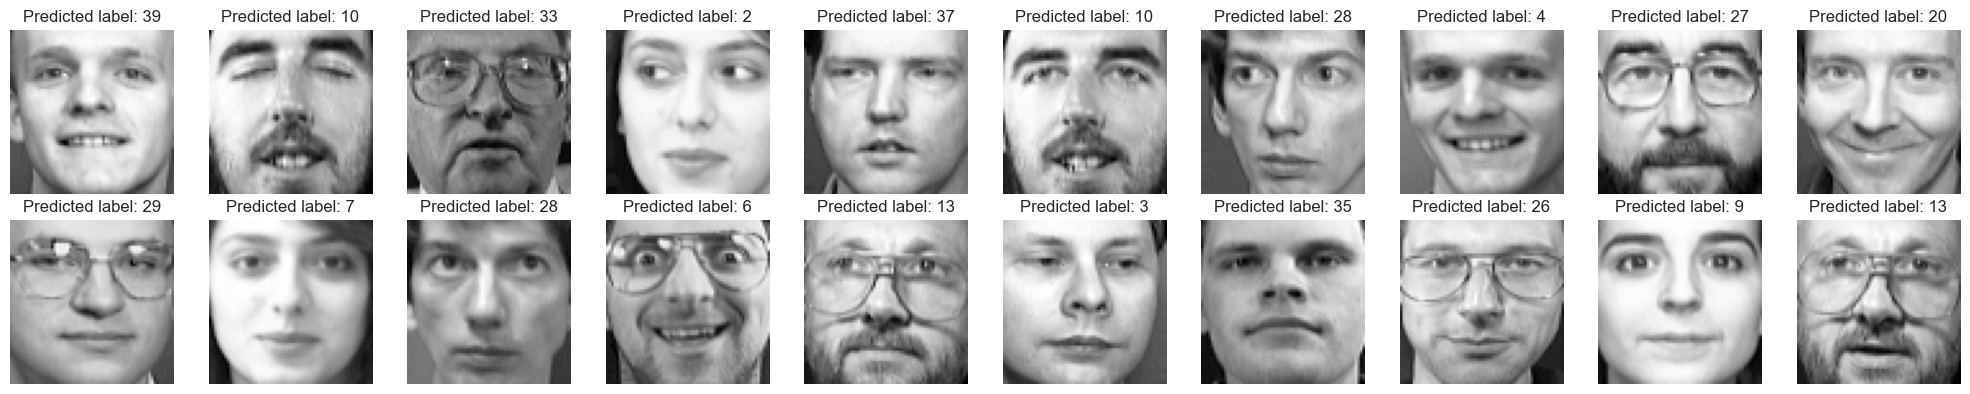

In [34]:
#Visual example
images = X_test[:20].reshape(-1, 64, 64) 
labels = predicted_class[:20]

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i in range(2):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(images[i*10+j], cmap='grey')
        ax.set_title(f"Predicted label: {labels[i*10+j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

The real classes of the test set are:

In [35]:
print(y_test)

[ 4 10 33  7 37 10 28  4 27  2  5  7 28  6 13  3 35 26  9 13 25 27 38  0
 16 35 14  2 34 37 11 32 12 22 28  3  0  7 33  9  5 14 39 34  6 33 20 24
 34  8 36 31 17 21 18 20 35 22 39 36 16 29 25 30 32 21 17 36  8 11 10 25
 38  9 26 15 17  2  6 11 29 18 16 31 12 13 38 32  8 21 31  5  1 19 23 27
 37  1 29 30 19  3 22 14 19 15 39 15 23 24 20 26 18 24 30  4 23  1  0 12]


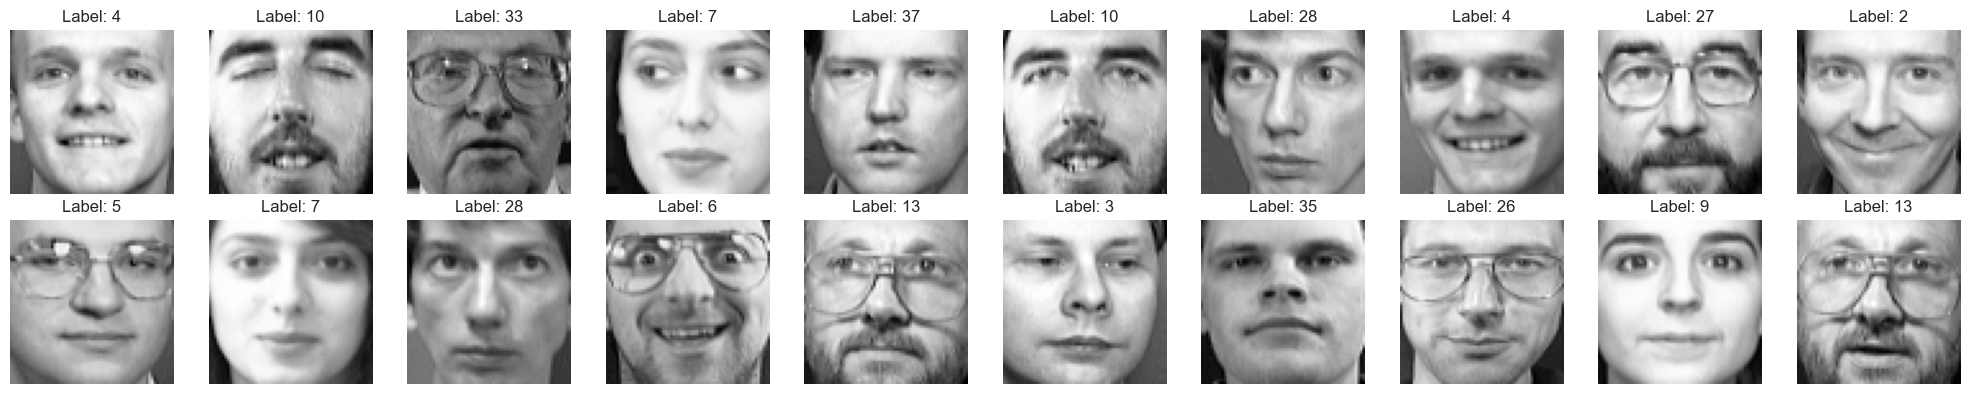

In [36]:
#Visual example
images = X_test[:20].reshape(-1, 64, 64) 
labels = y_test[:20]

fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i in range(2):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(images[i*10+j], cmap='grey')  
        ax.set_title(f"Label: {labels[i*10+j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

We now construct the confusion matrix and the report to also see the accuracy of the model.

CONFUSION MATRIX:


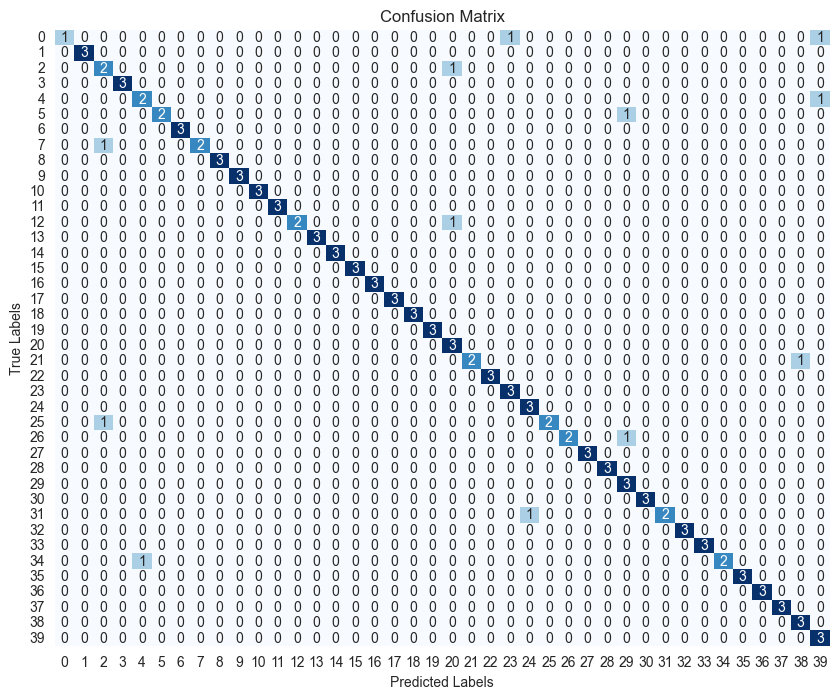


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
  

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def create_confusionMatrix_andReport(predicted_class):
    conf_matrix = confusion_matrix(y_test,predicted_class)
    class_report = classification_report(y_test,predicted_class)
    print("CONFUSION MATRIX:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
 
    print("\nCLASSIFICATION REPORT :")
    print(class_report)
    
create_confusionMatrix_andReport(predicted_class)

This classification model achieves 90% accuracy.

# 3 Image compression

- How would you "compress" each image in the previous dataset by using any of the studied factorizations?
- Choose one image and plot the compressed one and determine the best $k$ orthogonal bases for its range. The "best $k$" is computed such that the approximated image will have a relative distance in 2-norm from the orignal image less than $10^{-2}$.
Plot the approximated image.

- Use $k$ principal directions for the range of all the images to repeat the classification task by using these directions rather than the whole images.

### Conduct of the exercise n.3
#### First point
In order to compress each image in the dataset, a studied and useful technique is **URV-factorisation** , which reduces dimensionality while retaining the main information.

In URV, a matrix $A$ (the image) is decomposed as:
$$
A = U R V^T
$$
where:
- $U$ and $V$ are unitary matrices,
- $R$ is a triangular matrix containing singular values.

To compress, we can truncate $R$, keeping only the most informative singular values. By doing so, we obtain an approximate version of $A$ that retains the essential information but occupies less memory space.

#### Second point

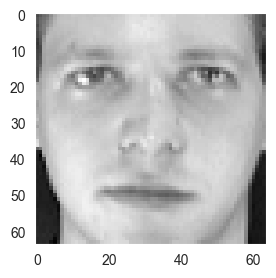

In [38]:
img = data[0].reshape(64, 64)  # 64x64 pixel
plt.figure(figsize=(3, 3))
plt.imshow(img, cmap='gray')
plt.grid(False)
plt.show()

In [39]:
def relative_distance(original_Matrix, reconstruction_matrix):
    normNum = linalg.norm(original_Matrix - reconstruction_matrix)
    normDen = linalg.norm(original_Matrix)
    
    error = normNum/normDen
    
    return error

We apply URV factorisation to image:

In [41]:
import numpy as np
import scipy.linalg as spl

#URV factorization,starting from QR fattorization
[Qimg,Rimg,Pimg]=spl.qr(img,pivoting=True)
[Ql,Rl]=spl.qr(Rimg.T)

ndi=(np.diag(Rl))

We calculate the best k taking into account a set of tolerances, but also the distance between the original and the reconstructed matrix, which, based on the Euclidean norm, must not exceed 1e-2:

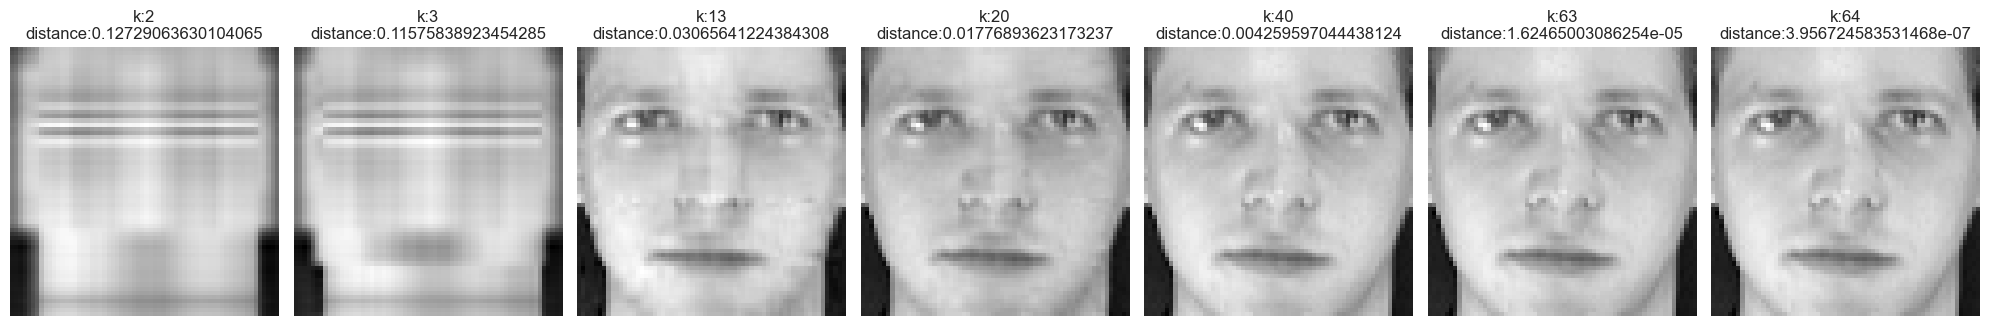

In [42]:
tol=[1e-1,5e-2,1e-2,5e-3,1e-3,1e-5,1e-8]

imgs = []
k = []
distances  = []
k_opt = []

for ind in tol:
 nc=np.sum(abs(ndi)/max(abs(ndi)) >= ind)
 k.append(nc)
 
 QA=np.copy(Qimg[:,0:nc])
# QA basis for the column space of A
 RA=np.copy(Rl[0:nc,0:nc].T)
 QLA=np.copy(Ql[:,0:nc].T)
 
 Apimg=np.dot(np.dot(QA,RA),QLA)
 PTimg = np.zeros(Pimg.shape,dtype=int) 
 PTimg[Pimg]=range(Pimg.shape[0])
 Apimg=Apimg[:,PTimg]
 imgs.append(Apimg)
 
 dist= relative_distance(img,Apimg)
 if dist< 1e-2:
     k_opt.append(int(nc))
 distances.append(dist)

fig, axes = plt.subplots(1, len(imgs), figsize=(20, 4))

for i in range(1):
    for j in range(len(imgs)):
        ax = axes[j]
        ax.imshow(imgs[i*10+j], cmap='grey')
        ax.set_title(f"k:{k[j]}\ndistance:{distances[j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

In [43]:
print(f'The optimal k are: {k_opt}')

The optimal k are: [40, 63, 64]


Since the objective is to compress the original image which is 64*64 in size, then we choose as best k, 40.

#### Third point
We now repeat the classification task considering 40 k:

In [44]:
from sklearn.decomposition import PCA
k = 40

pca = PCA(copy=True, n_components=k,whiten = True).fit(X_trainC) 
IM_pca = pca.transform(X_trainC)      
IM_pca = IM_pca/np.sqrt(nrc)

print("IM_pca: " + str(IM_pca.shape))

IM_pca: (280, 40)


In [45]:
cli = {}
for i in range(40):  # Da 0 a 40 inclusi
    cli[str(i)] = []
    
unique_classes = np.unique(y_train)

for c in unique_classes:
    for index,val in enumerate(y_train):
        if val == c:
            PT1 = X_trainC[index]
            Pimg = pca.transform([PT1])
            cli[str(c)].append(Pimg)
    cli[str(c)] = np.asarray(cli[str(c)])

om = {}
for i in range(0,40):
    om[i]=np.mean(cli[str(i)],axis=0)

In [46]:
(nrc,nt) = X_test.shape

X_testC = centralizing_matrix(X_test,nrc,nt)
X_testC.shape

(120, 4096)

In [47]:
testProjector = []

for i in range(0,120): 
    PT1_t = X_testC[i]
    Pimg_t = pca.transform([PT1_t])
    testProjector.append(Pimg_t)

len(testProjector)

120

In [48]:
from numpy.linalg import norm

predicted_class = []

for projectionT in testProjector:
    distance_min = float('inf')
    predict_class = -1
    for class_id,mean_comp in om.items():
        distance = norm(mean_comp-projectionT,2)
        if distance < distance_min:
            distance_min = distance
            predict_class = class_id
    predicted_class.append(predict_class)

In [49]:
print(predicted_class)

[4, 10, 33, 2, 37, 10, 28, 4, 27, 20, 5, 7, 28, 6, 13, 3, 35, 26, 39, 13, 2, 27, 38, 20, 16, 35, 14, 2, 34, 37, 11, 32, 12, 22, 28, 3, 20, 7, 33, 9, 5, 14, 39, 4, 6, 33, 20, 24, 39, 8, 36, 31, 17, 21, 39, 20, 35, 22, 39, 36, 16, 29, 25, 30, 32, 38, 17, 36, 8, 11, 10, 25, 38, 9, 26, 15, 17, 2, 6, 11, 5, 18, 16, 20, 14, 13, 38, 32, 8, 21, 31, 5, 1, 19, 23, 27, 37, 1, 29, 5, 19, 3, 22, 14, 19, 15, 20, 15, 23, 24, 20, 26, 18, 24, 30, 4, 23, 1, 0, 24]


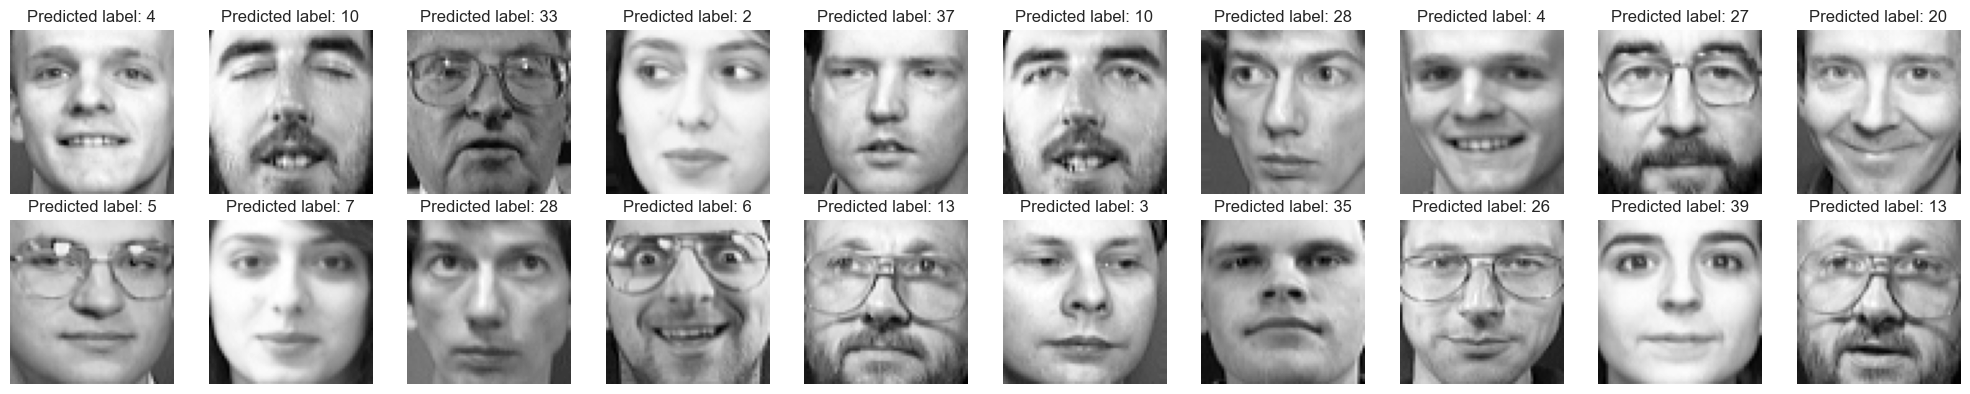

In [50]:
images = X_test[:20].reshape(-1, 64, 64) 
labels = predicted_class[:20]

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Iterazione sui subplot e aggiunta delle immagini e delle label
for i in range(2):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(images[i*10+j], cmap='grey')  # Visualizza in scala di grigi
        ax.set_title(f"Predicted label: {labels[i*10+j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

In [51]:
print(y_test)

[ 4 10 33  7 37 10 28  4 27  2  5  7 28  6 13  3 35 26  9 13 25 27 38  0
 16 35 14  2 34 37 11 32 12 22 28  3  0  7 33  9  5 14 39 34  6 33 20 24
 34  8 36 31 17 21 18 20 35 22 39 36 16 29 25 30 32 21 17 36  8 11 10 25
 38  9 26 15 17  2  6 11 29 18 16 31 12 13 38 32  8 21 31  5  1 19 23 27
 37  1 29 30 19  3 22 14 19 15 39 15 23 24 20 26 18 24 30  4 23  1  0 12]


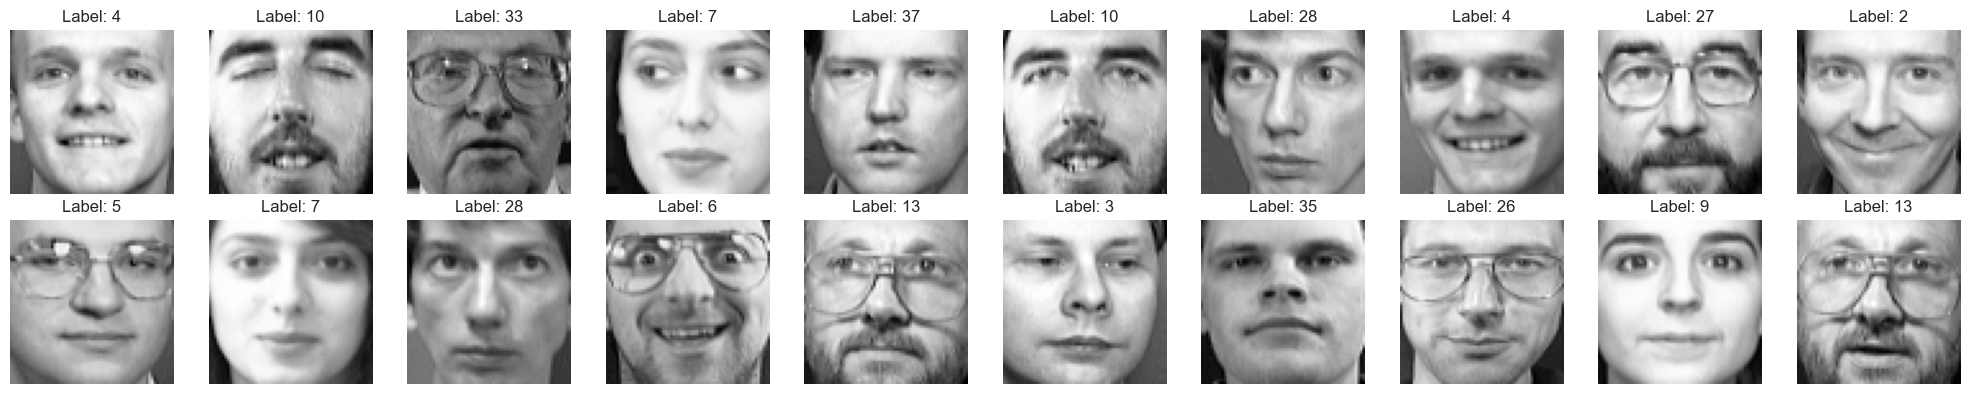

In [51]:
images = X_test[:20].reshape(-1, 64, 64) 
labels = y_test[:20]

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Iterazione sui subplot e aggiunta delle immagini e delle label
for i in range(2):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(images[i*10+j], cmap='grey')  # Visualizza in scala di grigi
        ax.set_title(f"Label: {labels[i*10+j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

CONFUSION MATRIX:


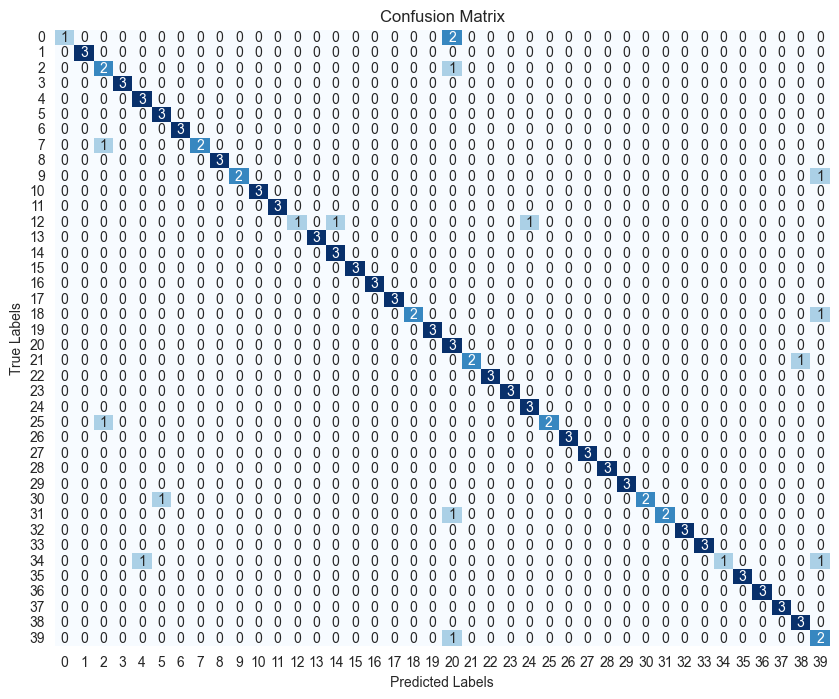


CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
  

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def create_confusionMatrix_andReport(predicted_class):
    conf_matrix = confusion_matrix(y_test,predicted_class)
    class_report = classification_report(y_test,predicted_class)
    print("CONFUSION MATRIX:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
 
    print("\nCLASSIFICATION REPORT :")
    print(class_report)
    
create_confusionMatrix_andReport(predicted_class)

We achieved a slightly lower accuracy than the previous classifier.